In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Reading Data

In [2]:
training_data = pd.read_csv("train_users_2.csv")
training_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
countries = pd.read_csv("countries.csv")
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


## Class labels (country_distnation) column
- counts of each country 

In [4]:
training_data['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

- Percentages plot

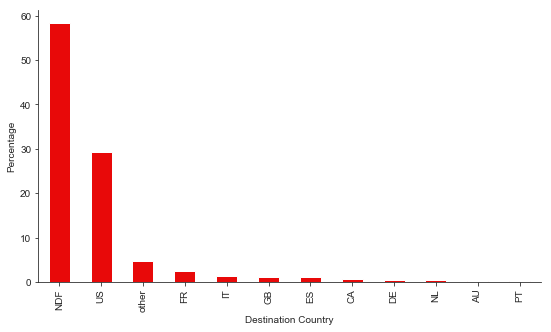

In [5]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
destination_perc = training_data['country_destination'].value_counts() / len(training_data['country_destination']) * 100
destination_perc.plot(kind='bar',color='#E80909')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

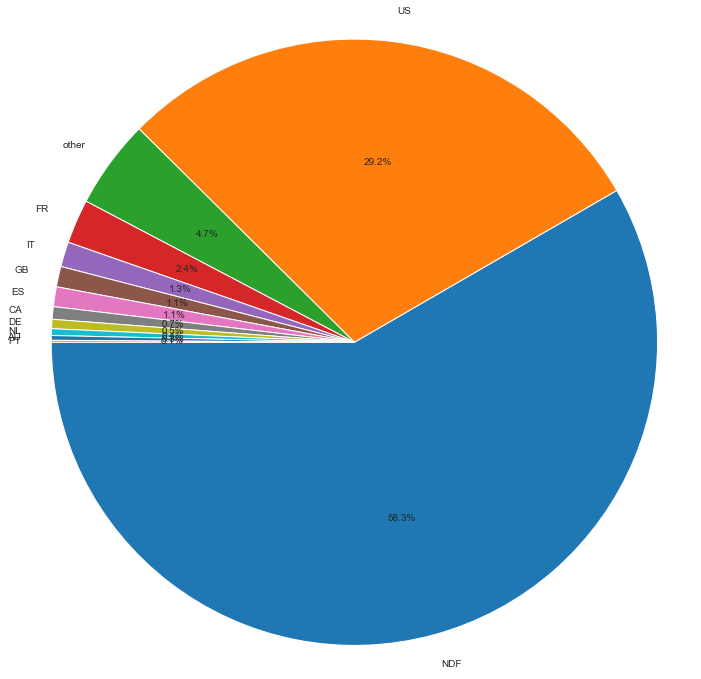

<Figure size 432x288 with 0 Axes>

In [14]:
sns.set_style('ticks')
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 12)
ax1.pie(list(destination_perc.values), labels=list(destination_perc.index), autopct='%1.1f%%',shadow=False, startangle=180)
ax1.axis('equal') 

plt.show()


<Figure size 432x288 with 0 Axes>

##### Observation 
- 58.3% of users didn't travel
- most Traveling users prefer to travel inside US (29.2%)

- As training data, it's unbalanced and that will affect the accuracy 


## Age Exploration

In [28]:
training_data['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

##### observation 
- There is false data as the maximum age her is 2014 (that's not possible) 
    and the minimum is 1 year and that means tha 1 year old kids have accounts 

In [29]:
training_data.loc[training_data['age']>120,'age'].describe()

count     781.000000
mean     2006.308579
std        95.711349
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [30]:
training_data.loc[training_data['age']<18,'age'].describe()

count    158.000000
mean      12.202532
std        5.916359
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

#### Taking 95 and 14 as age threshold and igonring any outliers 

In [31]:
training_data = training_data.loc[(training_data['age']<95) & (training_data['age']>14)]
training_data['age'].describe()

count    122917.000000
mean         36.489355
std          11.514983
min          15.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          94.000000
Name: age, dtype: float64

C:\Users\Mooha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


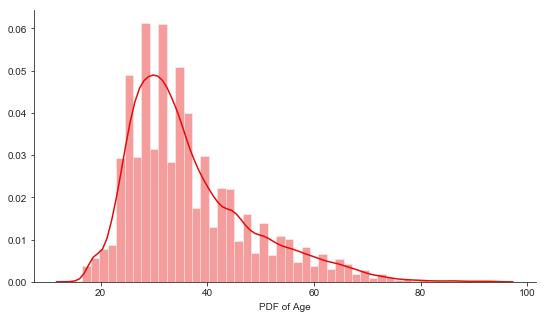

In [32]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
sns.distplot(training_data['age'].dropna(), color='#E80909')
plt.xlabel('PDF of Age')

sns.despine()

##### Observation 
- Majority of the users are between age 25 and 40 years and the average age for users is 36
- Only 25% of users are above 42 years 


### Dividing users to old and young based on the above analysis  

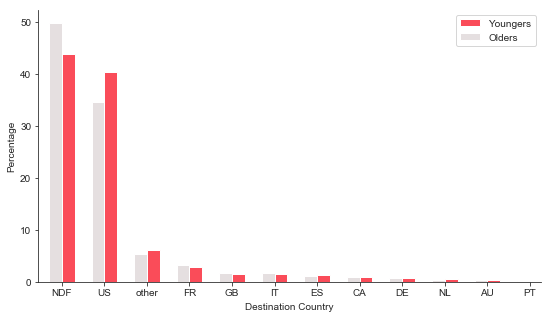

In [33]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

old = len(training_data.loc[training_data['age']>42,'age'])
young = len(training_data.loc[training_data['age']<42,'age'])

younger_destinations = training_data.loc[training_data['age'] < 42, 'country_destination'].value_counts() / young * 100
older_destinations = training_data.loc[training_data['age'] > 42, 'country_destination'].value_counts() / old * 100

younger_destinations.plot(kind='bar', color='#FA4C59',width=.3, position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', color='#E5DFE0', width=.3,position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()


##### Observation
- Percentatge of young people who likes to stay in US is higher 

## Gender Exploration 

In [34]:
set(training_data['gender'])

{'-unknown-', 'FEMALE', 'MALE', 'OTHER'}

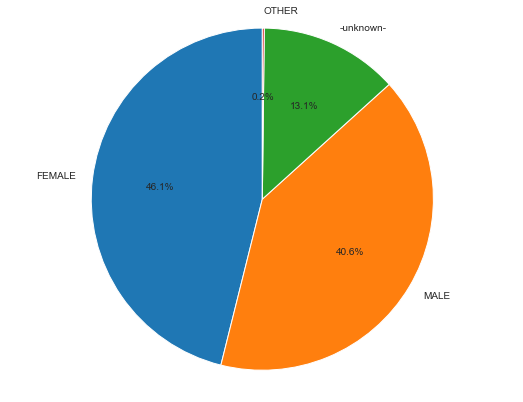

In [42]:
sns.set_style('ticks')
gender_perc = training_data['gender'].value_counts() / len(training_data['gender']) * 100

fig, ax1 = plt.subplots()
fig.set_size_inches(9, 7)
ax1.pie(list(gender_perc.values), labels=list(gender_perc.index), autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal') 

plt.show()

##### Observations
- We can say that both genders are balanced 
- Almost 13% of the data missing the Gender type 

In [43]:
training_data.gender.replace('-unknown-', np.nan, inplace=True)

#### Making genders dataframe 

In [44]:
# counting both genders and negleting "others" as it's very small number that will not even appear in the visuals 
women_count = sum(training_data['gender'] == 'FEMALE')
men_count = sum(training_data['gender'] == 'MALE')

#calculating perctages for each country distnation (for genders)
female_destinations = training_data.loc[training_data['gender'] == 'FEMALE', 'country_destination'].value_counts() / women_count * 100
male_destinations = training_data.loc[training_data['gender'] == 'MALE', 'country_destination'].value_counts() / men_count * 100
perc_df = pd.DataFrame(female_destinations)
perc_df['male_perc'] = male_destinations
perc_df=perc_df.reset_index()
perc_df.columns = ['country','female_perc','male_perc']
perc_df.head()

,country,female_perc,male_perc
0,NDF,47.918689,47.981164
1,US,37.038344,36.627592
2,other,5.103139,6.440236
3,FR,3.158582,2.480713
4,IT,1.766336,1.282437


In [45]:
countries=countries.round({'distance_km': 1}).fillna(0)
countries_dict = countries.loc[:,['country_destination','distance_km','language_levenshtein_distance']].set_index('country_destination')
countries_dict = countries_dict.to_dict()

### Adding distance for sotring

In [46]:
perc_df['distance'] = perc_df['country'].replace(countries_dict['distance_km'])
perc_df['language_distance'] = perc_df['country'].replace(countries_dict['language_levenshtein_distance'])

# Sotring dataframe according to distance countries_dict
sorted_df = perc_df[-((perc_df['country']=='NDF') | (perc_df['country']=='other'))]
special_df = perc_df[((perc_df['country']=='NDF') | (perc_df['country']=='other'))]
sorted_df = sorted_df.sort_values('distance')
perc_df = sorted_df.append(special_df)
perc_df = perc_df.set_index('country')
perc_df.head()

,female_perc,male_perc,distance,language_distance
country,,,,
US,37.038344,36.627592,0,0
CA,0.741120,0.895702,2828.1,0
GB,1.431067,1.278429,6883.7,0
PT,0.123520,0.126240,7355.3,95.45
NL,0.402322,0.522994,7524.3,63.22


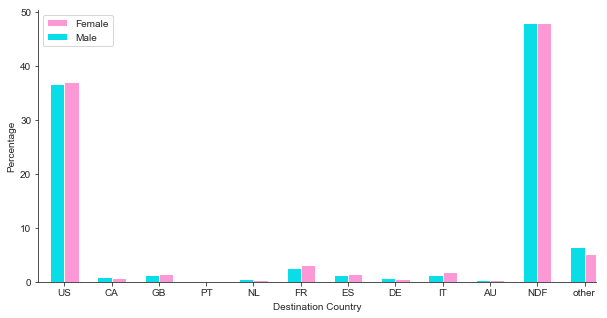

In [47]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)


perc_df['female_perc'].plot(kind='bar',color='#FC98D6', width=.3,position=0, label='Female', rot=0)
perc_df['male_perc'].plot(kind='bar', color='#09DEE8',width=.3, position=1, label='Male', rot=0)

plt.legend()

plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

##### Observations
- As the countries sorted from left to right we see that travellers outside US doesn't affected by the distance 
- Both different genders have the same behaviour with almost same percentages of their totals 

#### Sorting according to language distance
- Note : NDF will not be included in this graph

In [48]:
perc_df = perc_df.reset_index()

perc_df = perc_df[-(perc_df['country']=='NDF')]

sorted_df = perc_df[-(perc_df['country']=='other')]
special_df = perc_df[perc_df['country']=='other']
sorted_df = sorted_df.sort_values('language_distance')
perc_df = sorted_df.append(special_df)
perc_df.head()

,country,female_perc,male_perc,distance,language_distance
0,US,37.038344,36.627592,0,0
1,CA,0.741120,0.895702,2828.1,0
2,GB,1.431067,1.278429,6883.7,0
9,AU,0.342327,0.344655,15297.7,0
4,NL,0.402322,0.522994,7524.3,63.22


In [49]:
#Neglect US as it'll affect the percentage for 0 distance language 
temp = perc_df.copy()
temp = temp.loc[1:,:]

#Grouping all same language (English) together
temp = temp.groupby('language_distance', axis=0).sum()

# Maping for better visualization
countries_dict = { 0.0 : '[CA,GB,AU]',
                  63.22 : 'NL',
                  72.61 : 'DE',
                  89.4 : 'IT',
                  92.06 : 'FR',
                  92.25 : 'ES',
                  95.45: 'PT',
                  'NDF' : 'NDF',
                  'other':'other'
}
temp = temp.reset_index()
temp['country'] = temp['language_distance'].replace(countries_dict)
temp.set_index('country',inplace= True)
temp.head()

,language_distance,female_perc,male_perc
country,,,
"[CA,GB,AU]",0,2.514514,2.518786
NL,63.22,0.402322,0.522994
DE,72.61,0.573486,0.779481
IT,89.4,1.766336,1.282437
FR,92.06,3.158582,2.480713


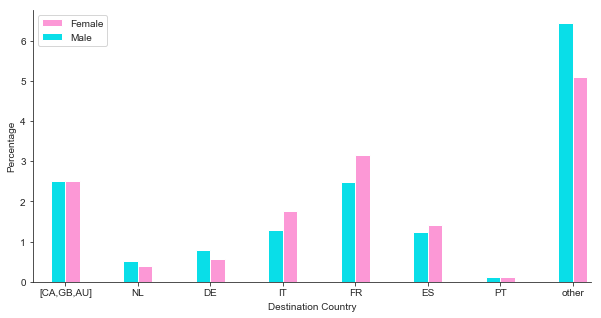

In [50]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)


temp['female_perc'].plot(kind='bar',color='#FC98D6',width=.2, position=0, label='Female', rot=0)
temp['male_perc'].plot(kind='bar', color='#09DEE8', width=.2,position=1, label='Male', rot=0)

plt.legend()

plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

##### Observation
- Some travellers outside US likes to travel to countries with same language but this factor also doesn't make a huge effect as we see in France

- Note that the y-axis limit are only 6% because of the ignorance of NDF 

## Sign-up Application  

In [51]:
training_data['signup_app'].value_counts()

Web        108492
iOS          9816
Moweb        2322
Android      2287
Name: signup_app, dtype: int64

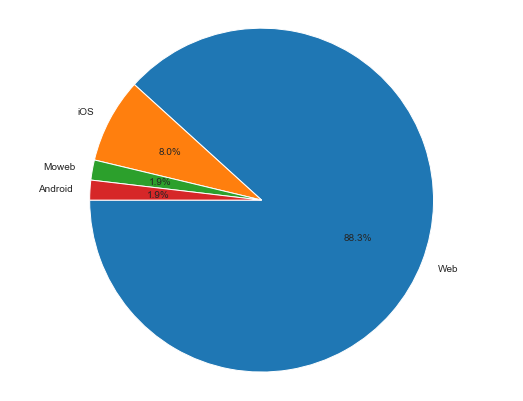

In [54]:
sns.set_style('ticks')
app_perc = training_data['signup_app'].value_counts() / len(training_data['signup_app']) * 100

fig, ax1 = plt.subplots()
fig.set_size_inches(9, 7)
ax1.pie(list(app_perc.values), labels=list(app_perc.index), autopct='%1.1f%%',shadow=False, startangle=180)
ax1.axis('equal') 

plt.show()

##### Observation
- Most of the users Registered from the website  
- Android and Mobile web are not used commonly specially in the first time users knows about the company 

## Sign_up method 

In [55]:
training_data['signup_method'].value_counts()

basic       65578
facebook    57199
google        140
Name: signup_method, dtype: int64

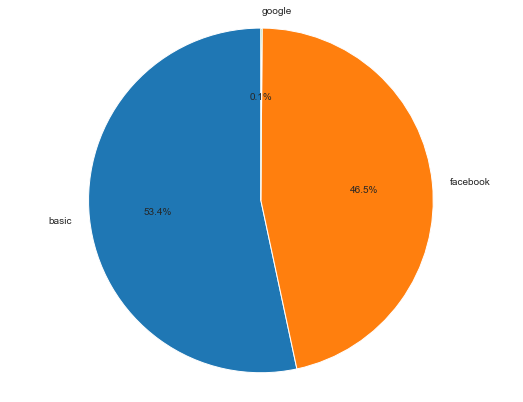

In [59]:
sns.set_style('ticks')
method_perc = training_data['signup_method'].value_counts() / len(training_data['signup_method']) * 100

fig, ax1 = plt.subplots()
fig.set_size_inches(9, 7)
ax1.pie(list(method_perc.values), labels=list(method_perc.index), autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') 

plt.show()

##### Observation
- Very small number of users use google to sign-up  
- Users almost devided into two categories in signing_up

In [57]:
pd.crosstab(training_data['signup_app'], training_data['signup_method'])

signup_method,basic,facebook,google
signup_app,,,
Android,964,1183,140
Moweb,1668,654,0
Web,58741,49751,0
iOS,4205,5611,0


##### Observation
- All Google users used Android while signing-up 
- Mobile users used facebook to sign-up more than the website (iOS and Android)

## Device Types 

In [69]:
training_data['first_device_type'].value_counts()

Mac Desktop           57106
Windows Desktop       41239
iPhone                10433
iPad                   7530
Other/Unknown          3948
Android Phone          1246
Desktop (Other)         741
Android Tablet          635
SmartPhone (Other)       39
Name: first_device_type, dtype: int64

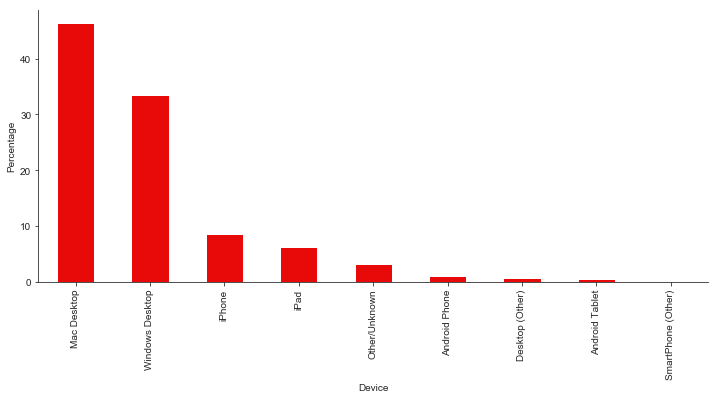

In [70]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
device_perc = training_data['first_device_type'].value_counts() / len(training_data['first_device_type']) * 100
device_perc.plot(kind='bar',color='#E80909')
plt.xlabel('Device')
plt.ylabel('Percentage')
sns.despine()

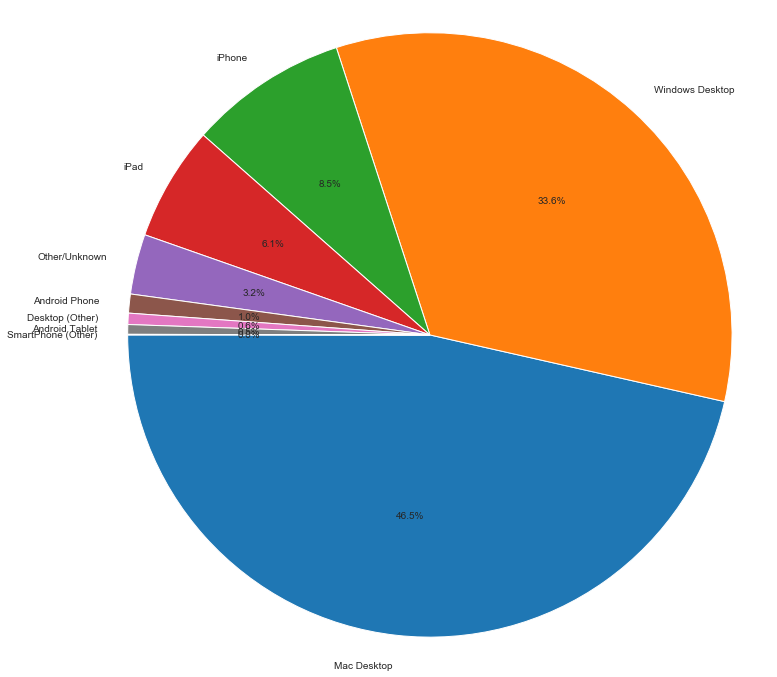

In [73]:
sns.set_style('ticks')

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 12)
ax1.pie(list(device_perc.values), labels=list(device_perc.index), autopct='%1.1f%%',
        shadow=False, startangle=180)
ax1.axis('equal') 

plt.show()

##### Observation
- Apple users conntributes with more than 60% to the company  
- Logically that Android phones users have only 1% as we saw in pervoiuse analysis that only 1.9% have signed-up using anroid 

## First Browser

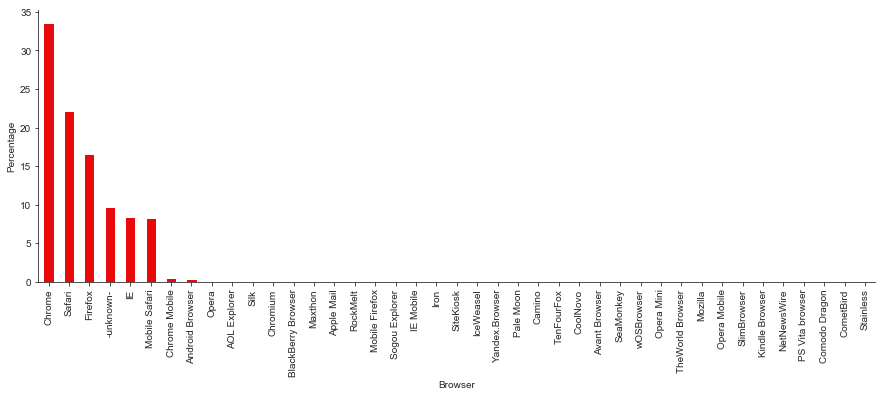

In [68]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
browser_perc = training_data['first_browser'].value_counts() / len(training_data['first_browser']) * 100
browser_perc.plot(kind='bar',color='#E80909')
plt.xlabel('Browser')
plt.ylabel('Percentage')
sns.despine()

In [63]:
pd.crosstab(training_data['first_browser'],training_data['signup_method'])

signup_method,basic,facebook,google
first_browser,,,
-unknown-,5412,6454,131
AOL Explorer,64,34,0
Android Browser,207,190,2
Apple Mail,16,7,0
Avant Browser,3,1,0
BlackBerry Browser,18,16,0
Camino,4,2,0
Chrome,21051,20210,3
Chrome Mobile,396,199,1
